In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [10]:
data.drop_duplicates(inplace=True)

In [11]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [12]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [13]:
print(data['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [14]:
print(data['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


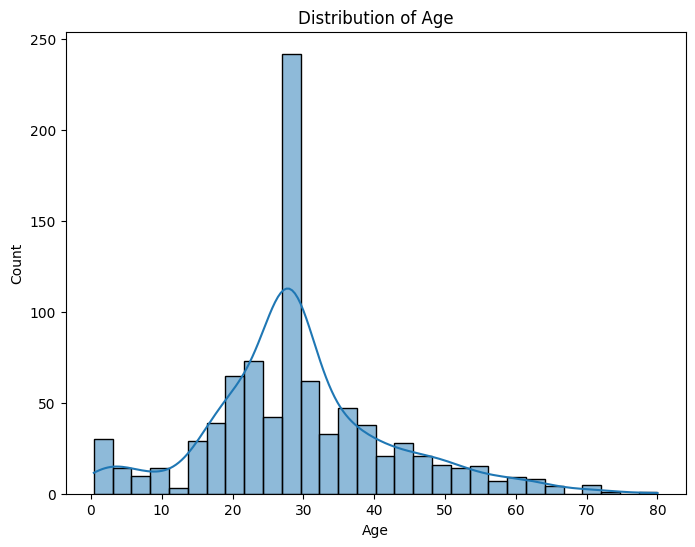

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

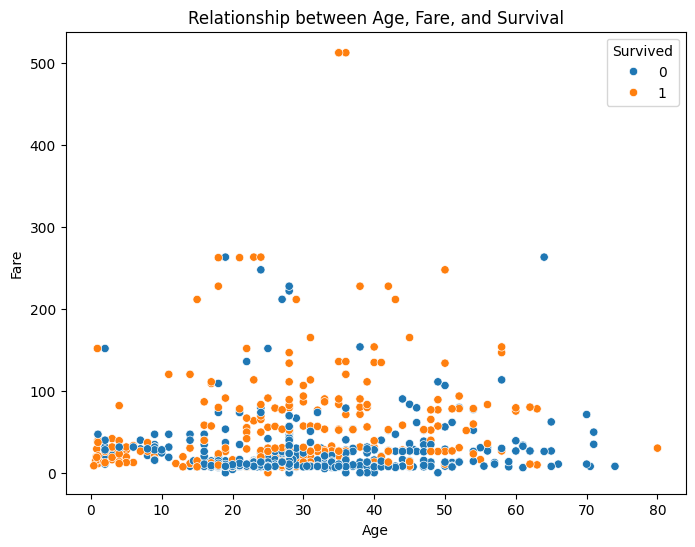

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Fare', data=data, hue='Survived')
plt.title('Relationship between Age, Fare, and Survival')
plt.show()

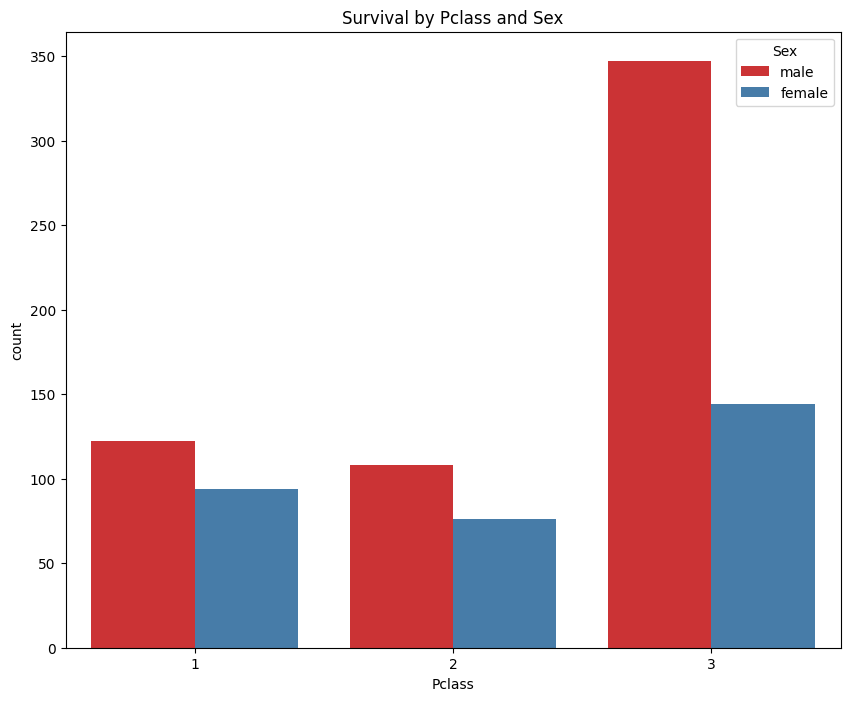

In [17]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Pclass', hue='Sex', data=data, palette='Set1', hue_order=['male', 'female'])
plt.title('Survival by Pclass and Sex')
plt.show()

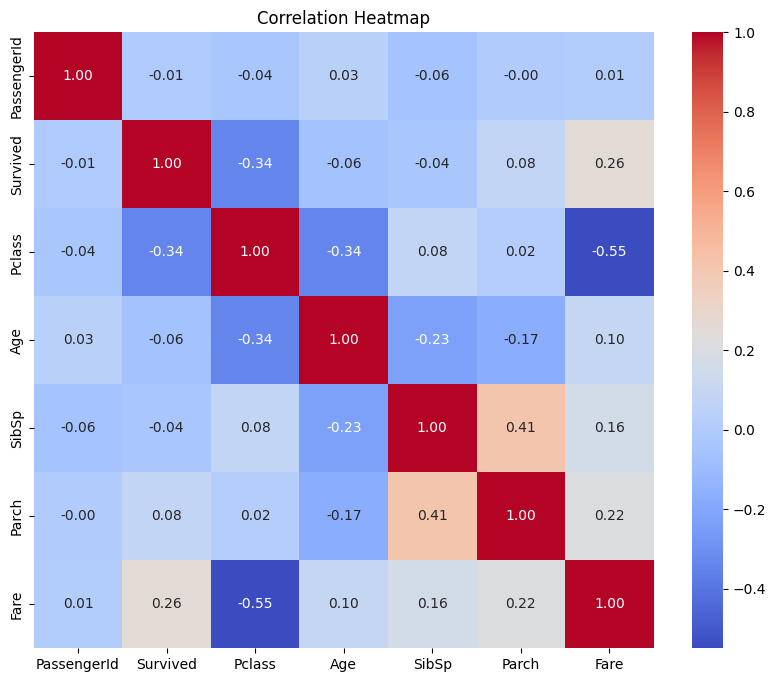

In [19]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])


plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<Axes: >

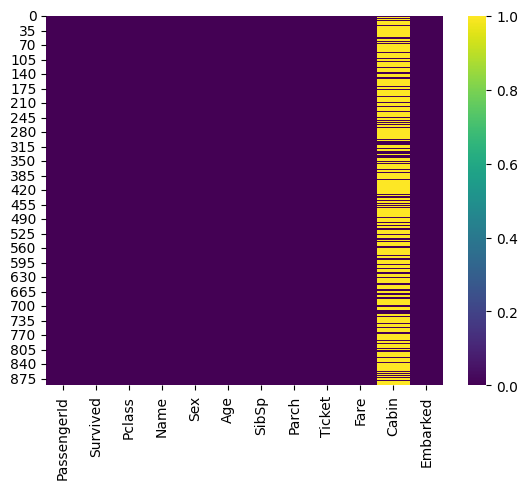

In [20]:
sns.heatmap(data.isnull(),cmap = 'viridis')

<Axes: xlabel='Survived', ylabel='count'>

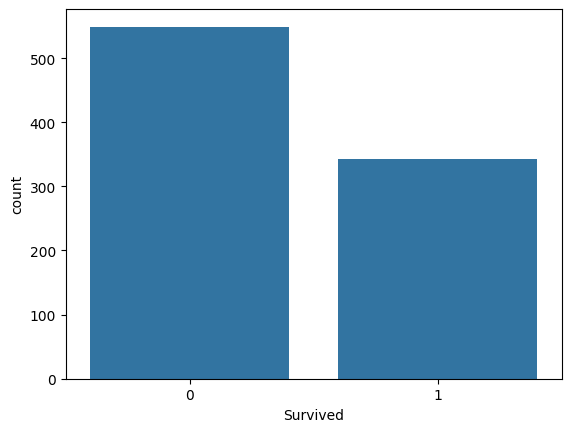

In [21]:
sns.countplot(x='Survived', data = data)

<Axes: xlabel='Survived', ylabel='count'>

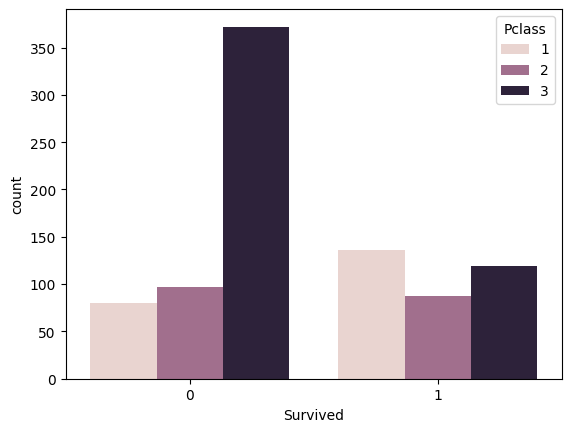

In [22]:
sns.countplot(x='Survived', data = data, hue = 'Pclass')

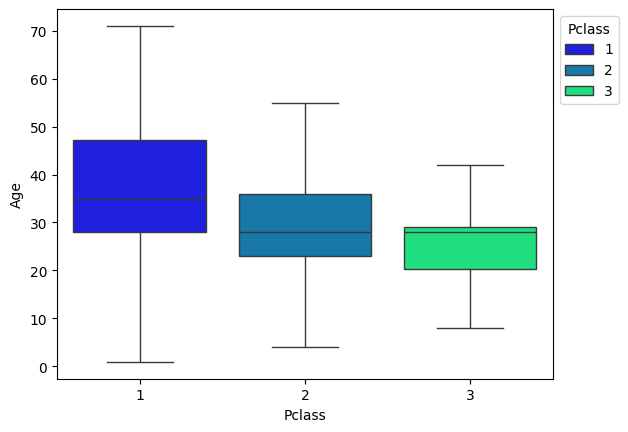

In [26]:
sns.boxplot(x='Pclass', y='Age', hue='Pclass', data=data, palette='winter', showfliers=False)
plt.legend(loc='upper left', title='Pclass', bbox_to_anchor=(1, 1))
plt.show()

In [37]:
if 'Cabin' in data.columns:
    data.drop('Cabin', axis=1, inplace=True)
    print("Column 'Cabin' dropped.")
else:
    print("Column 'Cabin' not found.")

print(data.info())



Column 'Cabin' not found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [38]:
pd.get_dummies(data['Embarked'],drop_first=True).head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [39]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [40]:
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [42]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [43]:
data = pd.concat([data,sex,embark],axis=1)

In [44]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [45]:
data.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [46]:
data['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64